<a href="https://colab.research.google.com/github/Varun-531/FML/blob/main/Lasso-Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.shape

(200, 4)

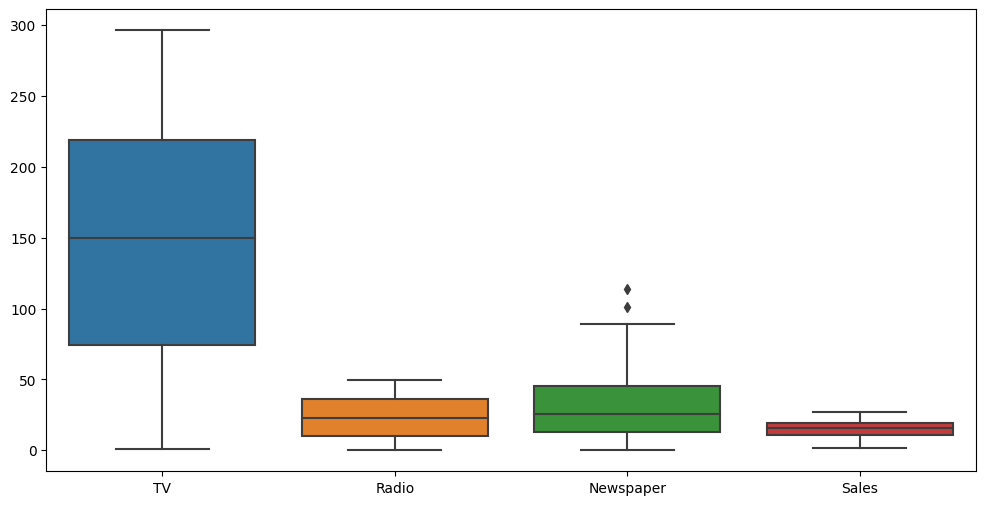

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

In [8]:
q1 = data["Newspaper"].quantile(0.25)
q3 = data["Newspaper"].quantile(0.75)
iqr=q3-q1
print(iqr)

32.35


In [9]:
up=q3+1.5*iqr
down=q1-1.5*iqr

print(up,down)

93.625 -35.775000000000006


In [12]:
outlier=[]
profit=data["Newspaper"]

for i in profit:
    if i>up:
        outlier.append(i)
        print("Up Outlier",i)
        
for i in profit:
    if i<down:
        outlier.append(i)
        print("Down Outlier",i)

Up Outlier 114.0
Up Outlier 100.9


In [13]:
data["Newspaper"]=data["Newspaper"].replace(outlier,data["Newspaper"].mean())

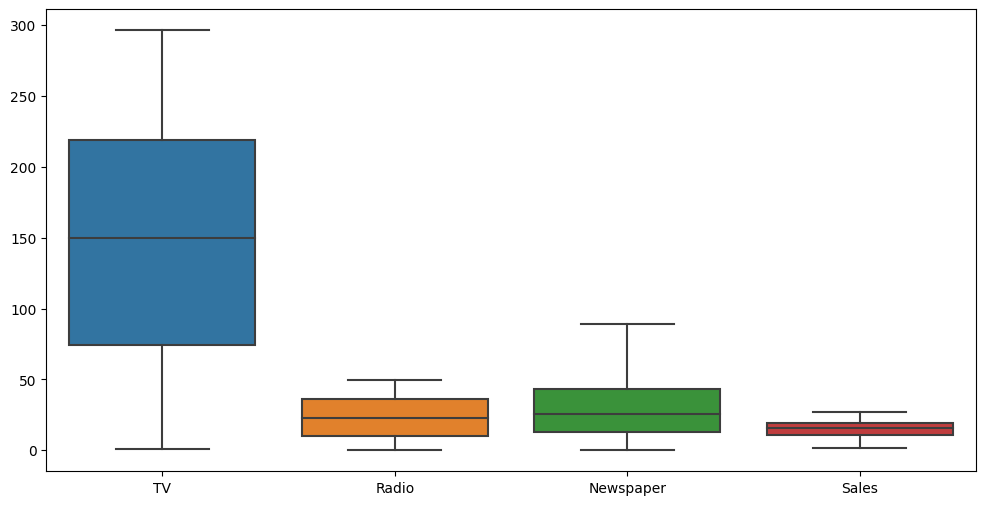

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.show()

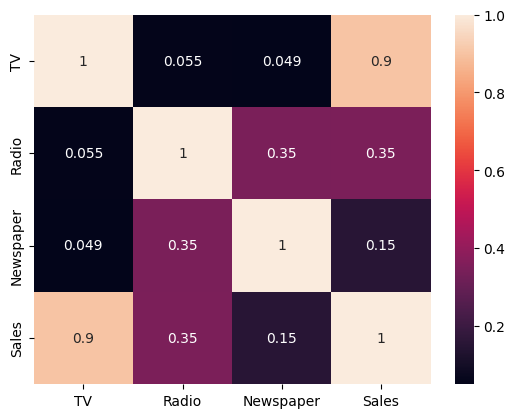

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
X = data.drop('Sales',axis=1)
y = data['Sales']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.12)
reg.fit(X_train,y_train)

Lasso(alpha=0.12)

In [24]:

y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(y_train,y_predict)
MSE = mean_squared_error(y_train,y_predict)
RMSE = np.sqrt(mean_squared_error(y_train,y_predict))
R2_SCORE = r2_score(y_train,y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.1962815600064811
MSE : 2.3013740466644106
RMSE : 1.517028030942214
R2_SCORE : 0.9119398549136152


In [25]:
y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(y_test,y_predict_test)
MSE = mean_squared_error(y_test,y_predict_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict_test))
R2_SCORE = r2_score(y_test,y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 1.342397059024445
MSE : 3.9572008648943227
RMSE : 1.9892714407275651
R2_SCORE : 0.8718442689640671
